# Homework 08, Matt Briskey

### 1. Explain the coefficient of determination ( R2 ).

The coefficient of determination is standardized version of the MSE and is used because it is easy to interpret the model's performance.  The R2 is the fraction of response variance that is captured by the model.  R2 ranges from 0 to 1 with numnbers closer to 1 indicating the model more accurately captures the response variance.  

### 2. Plot the scatter plot matrix and correlation matrix, pick two feature variables and perform linear regression to predict mpg.

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/mpg.csv').dropna()
df.head()

,mpg,cylinders,displacement,acceleration,model,origin
0,18.0,8,307.0,12.0,70,1
1,15.0,8,350.0,11.5,70,1
2,18.0,8,318.0,11.0,70,1
3,16.0,8,304.0,12.0,70,1
4,17.0,8,302.0,10.5,70,1


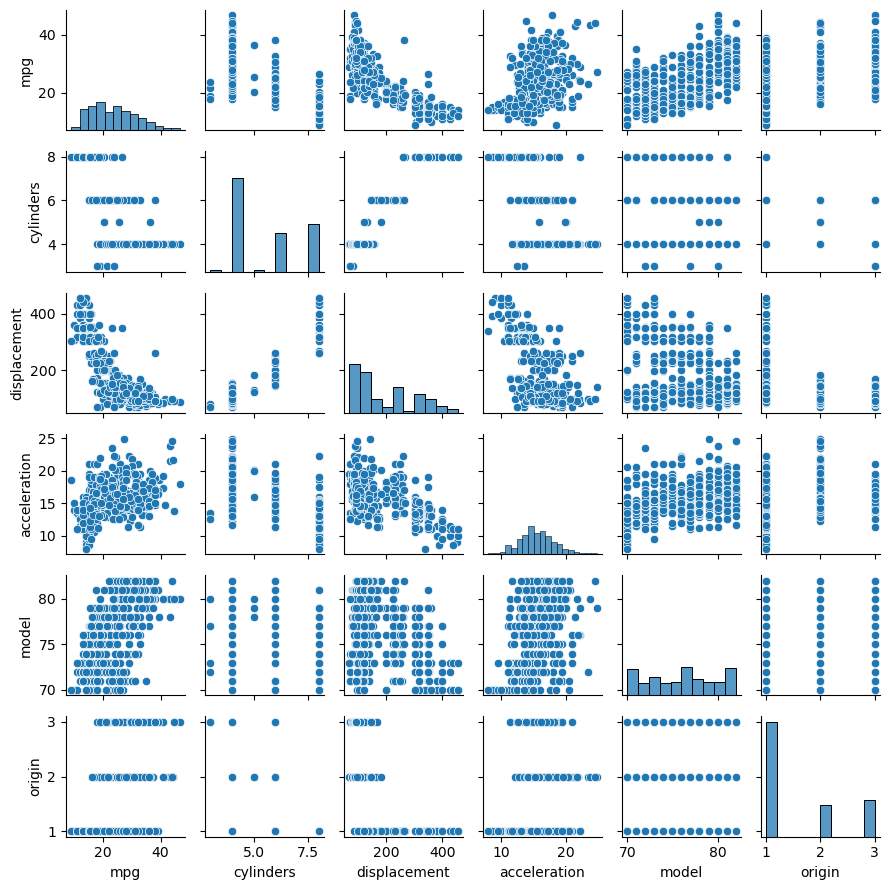

In [2]:
#Create a pairplot to show possible correlation between variables

sns.pairplot(df, height=1.5)
plt.tight_layout()
plt.show()

In [3]:
# Check for missing values
print(df.isnull().sum())

# Check for extremely large values
print(df.describe())

mpg             0
cylinders       0
displacement    0
acceleration    0
model           0
origin          0
dtype: int64
              mpg   cylinders  displacement  acceleration       model  \
count  398.000000  398.000000    398.000000    398.000000  398.000000   
mean    23.514573    5.454774    193.425879     15.568090   76.010050   
std      7.815984    1.701004    104.269838      2.757689    3.697627   
min      9.000000    3.000000     68.000000      8.000000   70.000000   
25%     17.500000    4.000000    104.250000     13.825000   73.000000   
50%     23.000000    4.000000    148.500000     15.500000   76.000000   
75%     29.000000    8.000000    262.000000     17.175000   79.000000   
max     46.600000    8.000000    455.000000     24.800000   82.000000   

           origin  
count  398.000000  
mean     1.572864  
std      0.802055  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max      3.000000  


In [4]:
# Check the shape of the data

df.shape

(398, 6)

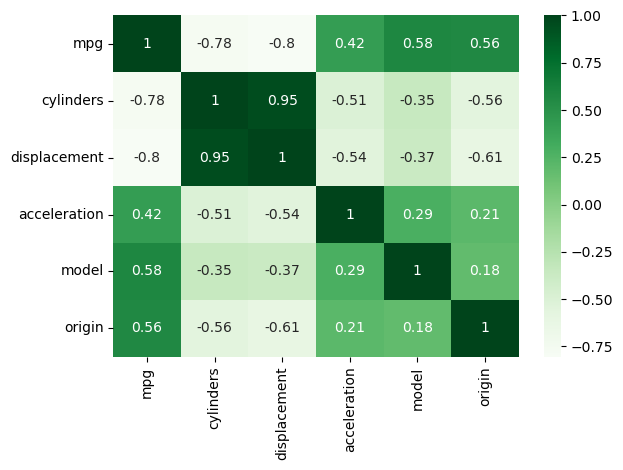

In [5]:
# Creating the correlation matrix
correlation_matrix = df.corr()

# Visualizing the correlation matrix with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='Greens')
plt.tight_layout()
plt.show()

In [6]:
# Define X and y

X = df[['acceleration','cylinders']].values
y = df['mpg'].values

In [7]:
# Use linear regressions from sklearn 

from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X, y)
y_pred = slr.predict(X)
print('Slope of acceleration: %.3f' % slr.coef_[0])
print('Slope of cylinders: %.3f' % slr.coef_[1])
print('Intercept: %.3f' % slr.intercept_)

Slope of acceleration: 0.108
Slope of cylinders: -3.474
Intercept: 40.784


mpg = 0.108 * acceleration - 3.474 * cylinders + 40.784

### 3. Using the picked predictor variables, split the data (20% test, 80% training), predict the mpg by linear regression, print the  R2  and MSE in both the training and test set, plot the residual. What does the residual plot tell you?

In [8]:
# Split the data into 20% test, 80% training

from sklearn.model_selection import train_test_split

X = df[['acceleration','cylinders']].values
y = df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [9]:
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [10]:
# Calculate the MSE for both the train and test data

from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))

MSE train: 24.428, test: 24.502


Having similar MSE for the train and test data indicates that the model isn't overfitting or underfitting

In [11]:
# Calculate the r2 for both the train and test data

from sklearn.metrics import r2_score

print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.595, test: 0.614


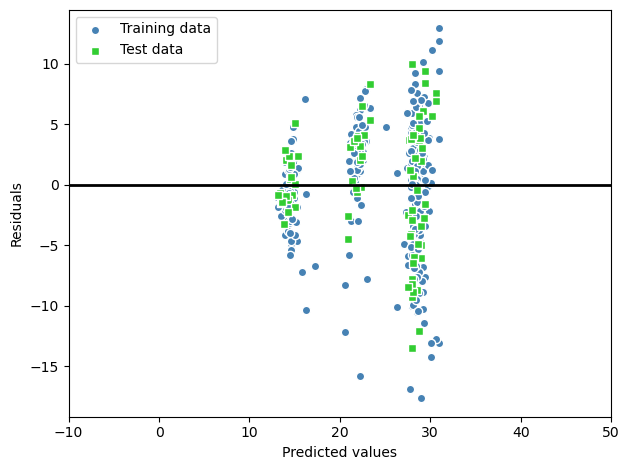

In [12]:
#Plot the residuals

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()

The residual plot visualizes the difference between the predicted values of mpg and the actual values of mpg.  It helps us understand how well the model's predictions align with the actual observed values and provides insights into the presence of any patterns or systematic errors in the model.  Ideally, we want the error to be random around 0.  If there are trends in the residual graph, it may indicate the model needs further tuned.  

### Comparing linear, quadratic, and cubic models

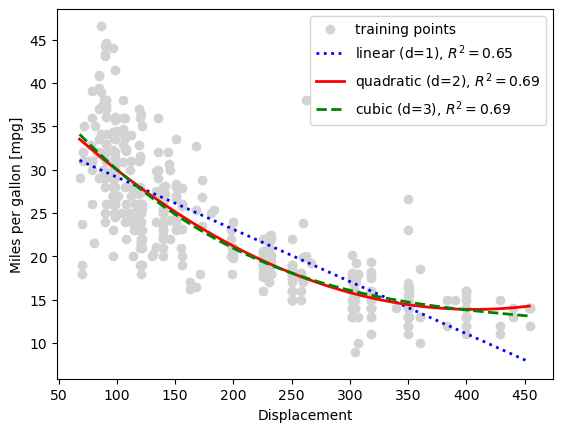

In [30]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = df[['displacement']].values
y = df['mpg'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green',
         lw=2,
         linestyle='--')

plt.xlabel('Displacement')
plt.ylabel('Miles per gallon [mpg]')
plt.legend(loc='upper right')

plt.show()